<a href="https://colab.research.google.com/github/MuhammadHelmyOmar/Authorship-Identification/blob/main/data_discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Next

- Data Discovery
  - topic analysis
  - Group by author
    - compare the statistics between authors
    - word length
    - Measure the similarity between authors
  - Fine-tuning a model
- Check the post eman sent
- Check what is zipf law

# Loading Data

In [1]:
import pandas as pd
from google.colab.drive import mount

In [2]:
mount('/content/drive')

Mounted at /content/drive


In [3]:
train_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Authorship Identification/Data/AuthorshipClassficiationTrain.xlsx')

train_data.head()

,id,text_in_author_style,author
0,5843,"هذه الكتب التي أصدرتُها منذ بدأت كتابة باب ""من...",يوسف إدريس
1,5844,صعب جِدًّا في ظل هذا التقسيم الإرهابي أن أقول ...,يوسف إدريس
2,5845,كان ممكنًا أن أتفادى هذا\n\nالموضوع الشائك، وأ...,يوسف إدريس
3,5846,ومن المُمكن للعراق وحده أن يَجتثَّه ويقضي على ...,يوسف إدريس
4,5847,كنتُ أريد أن أتناول موضوعًا من هذه المواضيع.\n...,يوسف إدريس


# Statistics

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

## Data Size

In [5]:
print(len(train_data))
print(len(train_data.author.value_counts()))
train_data.author.value_counts()

35122
21


,count
author,
حسن حنفي,3744
أحمد أمين,2897
جُرجي زيدان,2768
روبرت بار,2682
محمد حسين هيكل,2627
طه حسين,2376
عباس محمود العقاد,1829
فؤاد زكريا,1773
نجيب محفوظ,1634


In [6]:
train_data['text_in_author_style'].describe()

,text_in_author_style
count,35122
unique,32784
top,البهلول\n\nيدهشني ما بينك وبين بناتك من صلة؛ ف...
freq,2


## Text Sizes

In [7]:
train_data['text_size'] = train_data['text_in_author_style'].apply(len)
train_data.head()

,id,text_in_author_style,author,text_size
0,5843,"هذه الكتب التي أصدرتُها منذ بدأت كتابة باب ""من...",يوسف إدريس,1921
1,5844,صعب جِدًّا في ظل هذا التقسيم الإرهابي أن أقول ...,يوسف إدريس,1616
2,5845,كان ممكنًا أن أتفادى هذا\n\nالموضوع الشائك، وأ...,يوسف إدريس,1913
3,5846,ومن المُمكن للعراق وحده أن يَجتثَّه ويقضي على ...,يوسف إدريس,2047
4,5847,كنتُ أريد أن أتناول موضوعًا من هذه المواضيع.\n...,يوسف إدريس,2022


In [8]:
train_data['text_size'].describe()

,text_size
count,35122.000000
mean,1839.765702
std,314.538395
min,22.000000
25%,1769.000000
50%,1925.000000
75%,2000.000000
max,11639.000000


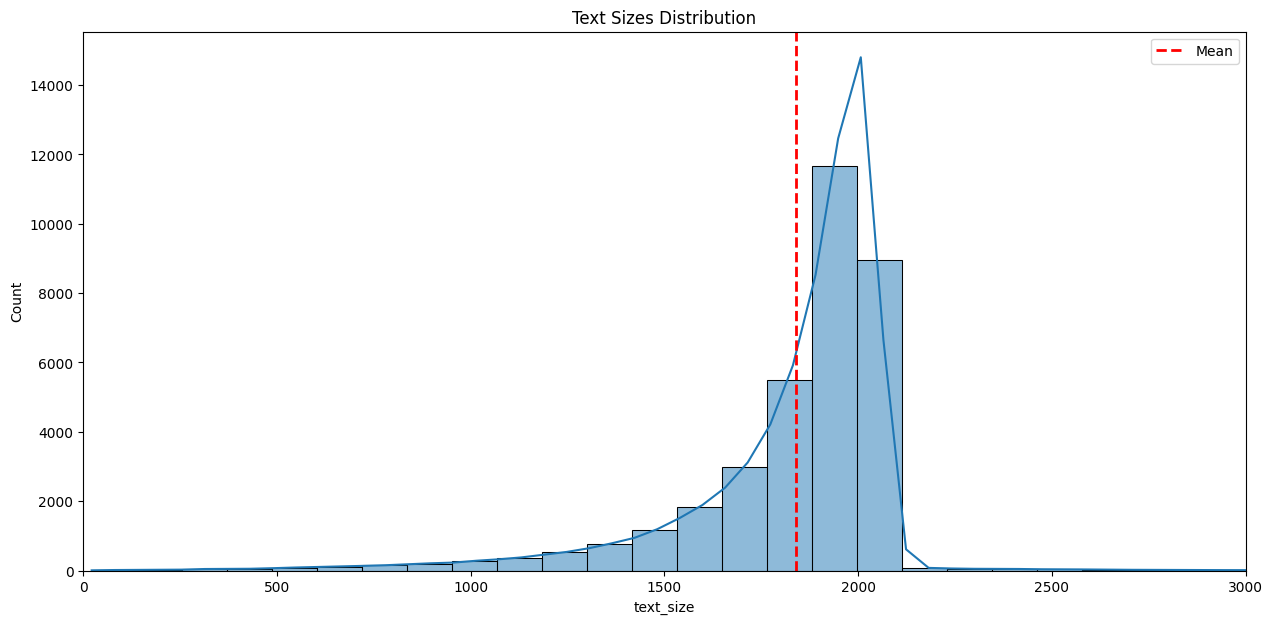

In [9]:
# Plot distribution of size
plt.figure(figsize=(15,7))
sns.histplot(train_data['text_size'], bins=100, kde=True) # Increased the number of bins to 100
plt.axvline(train_data['text_size'].mean(), color='r', linestyle='dashed', label='Mean', linewidth=2)
plt.legend()
plt.title("Text Sizes Distribution")
plt.xlim(0, 3000) # Set x-axis limits to focus on a specific range
plt.show()

## Group data by author

In [10]:
grouped_by_author = train_data.groupby('author')
len(grouped_by_author)

21

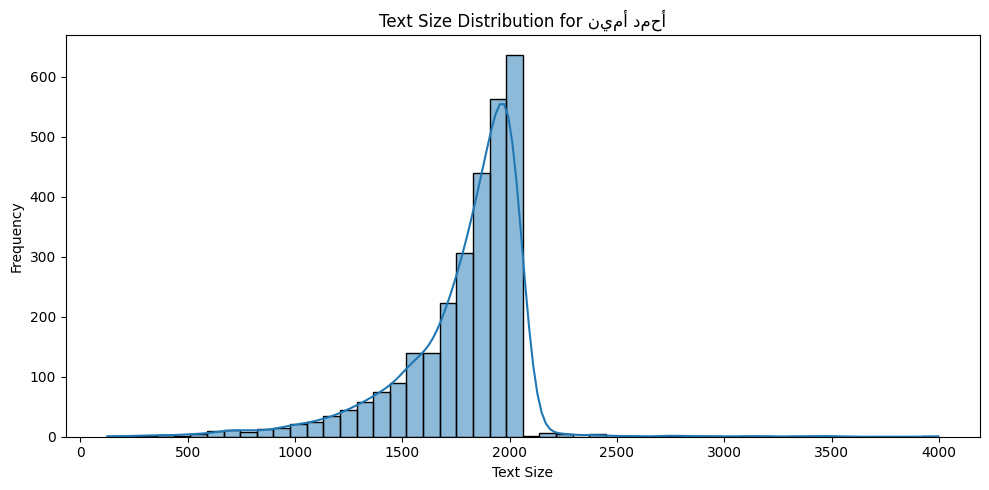

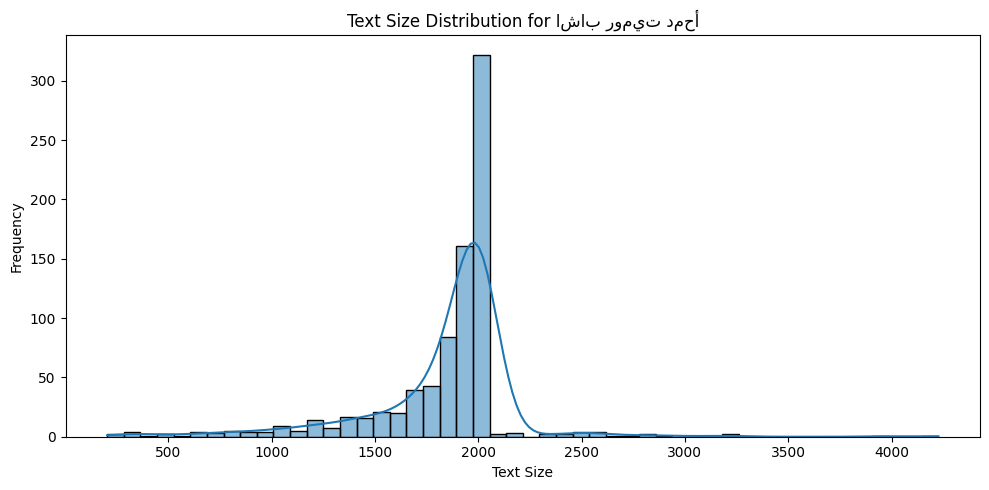

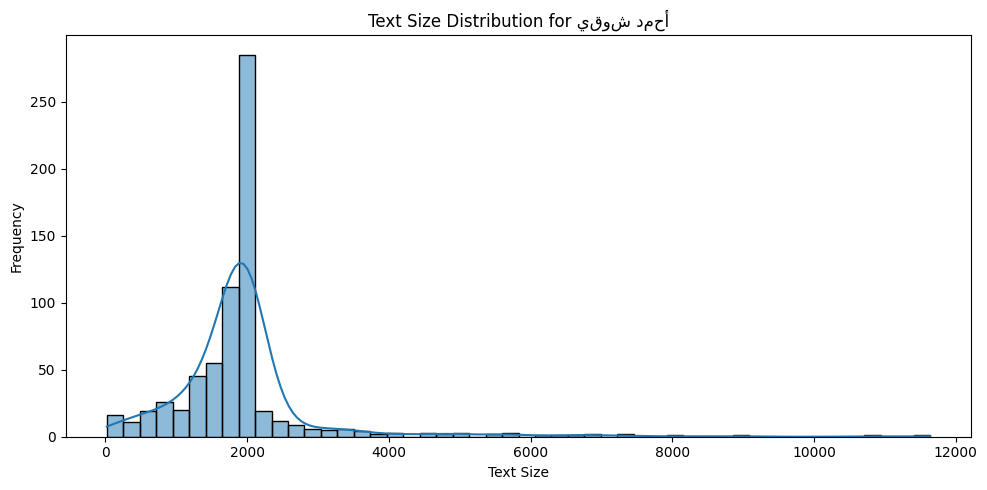

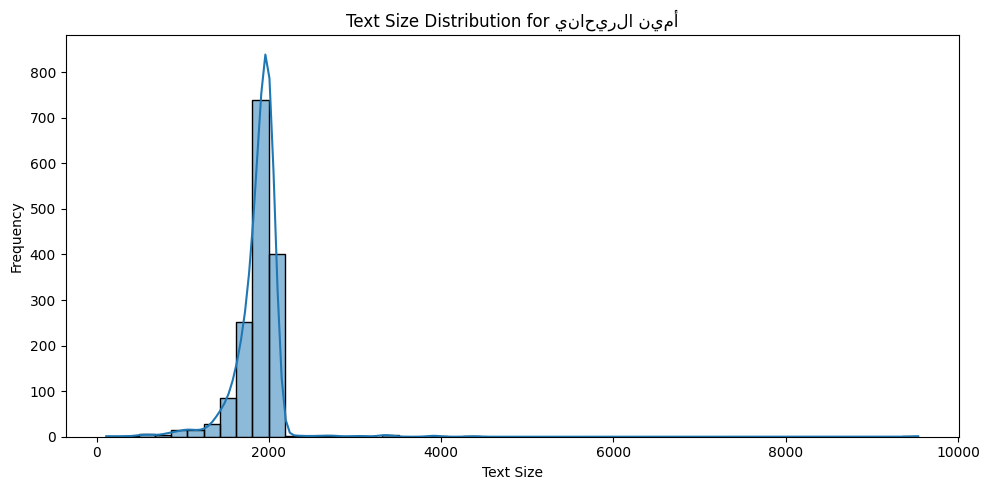

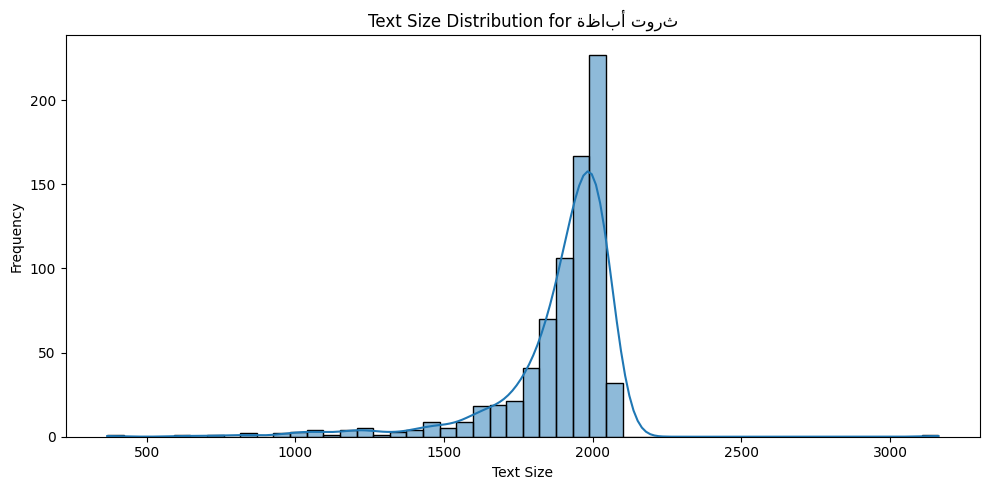

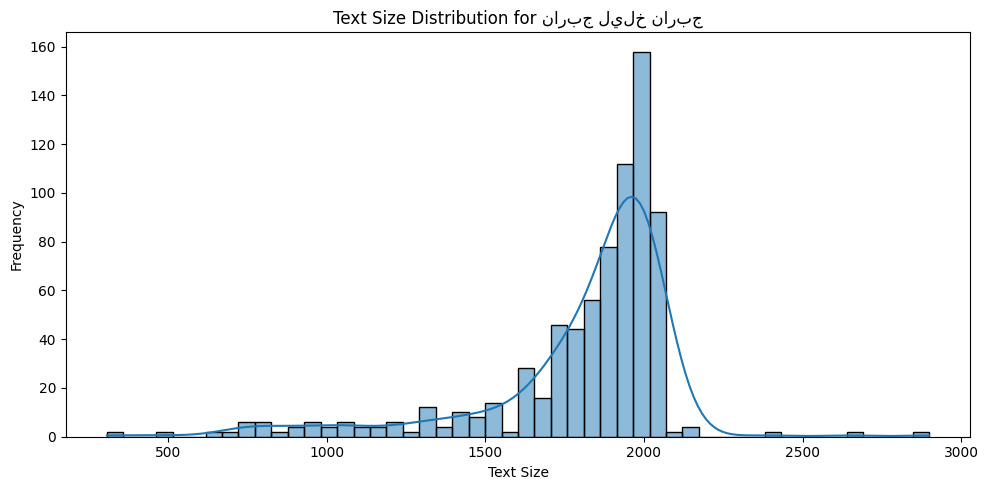

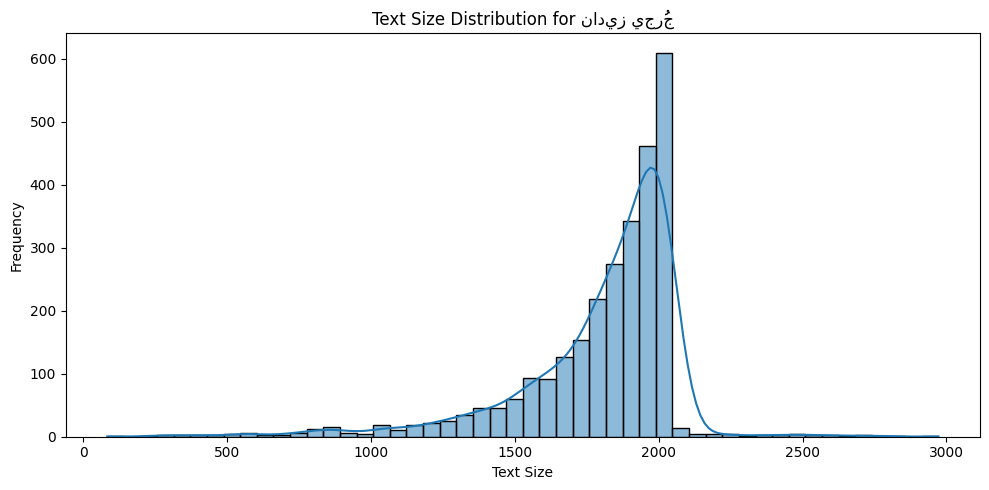

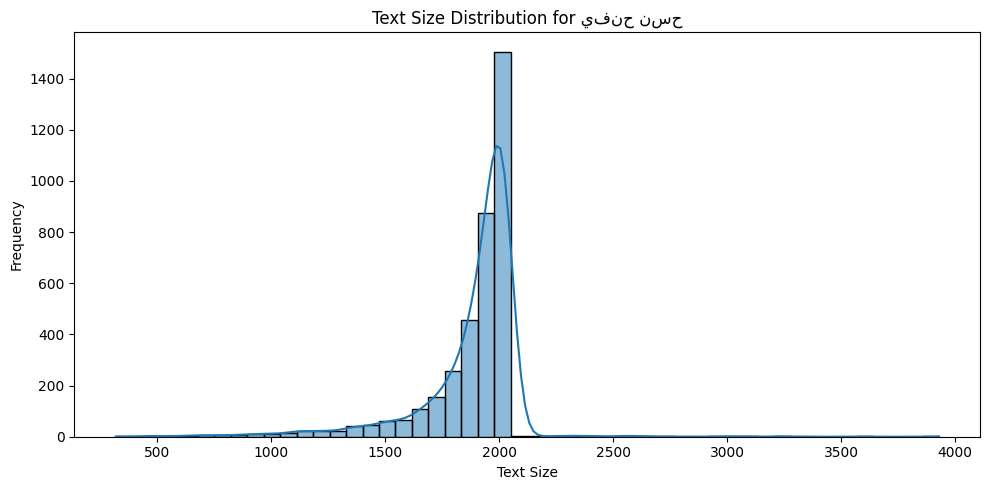

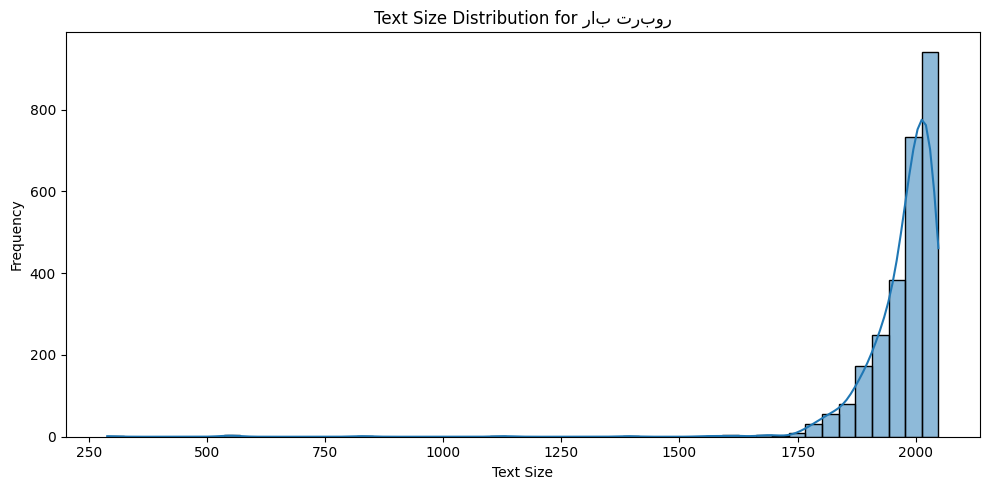

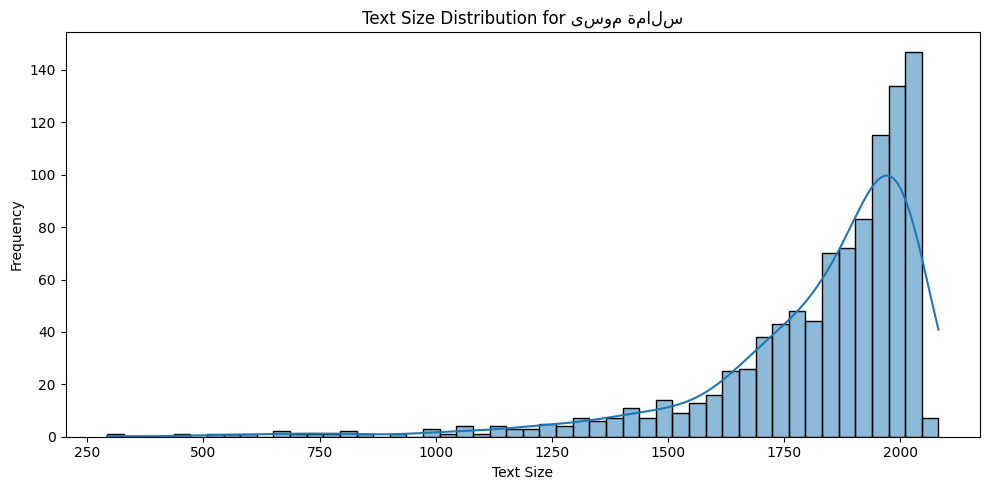

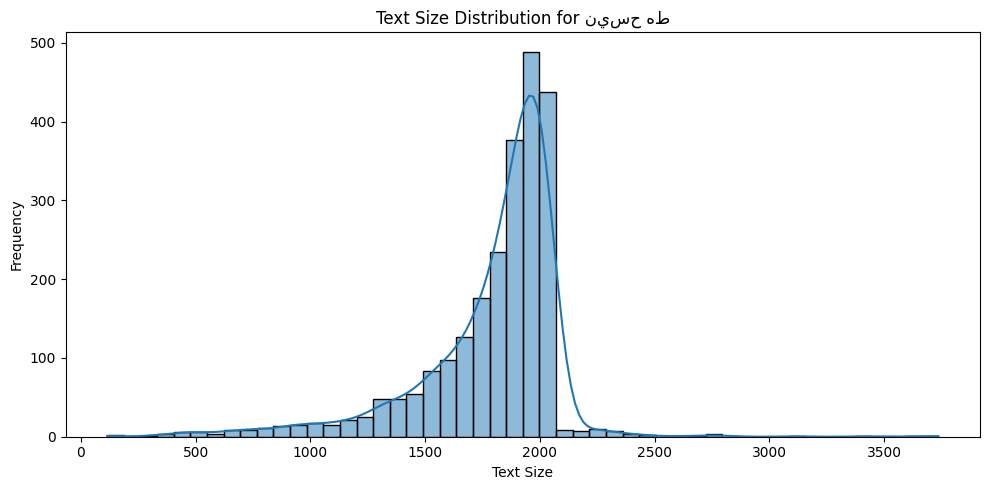

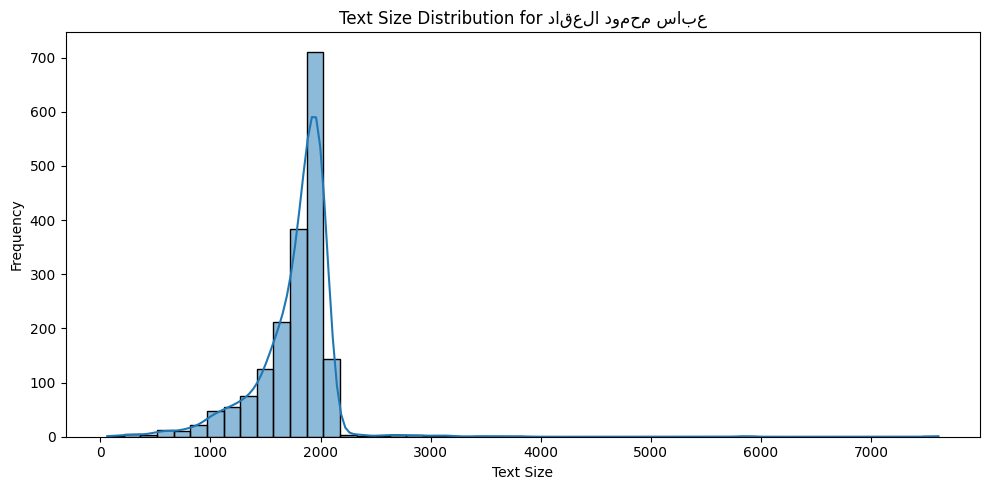

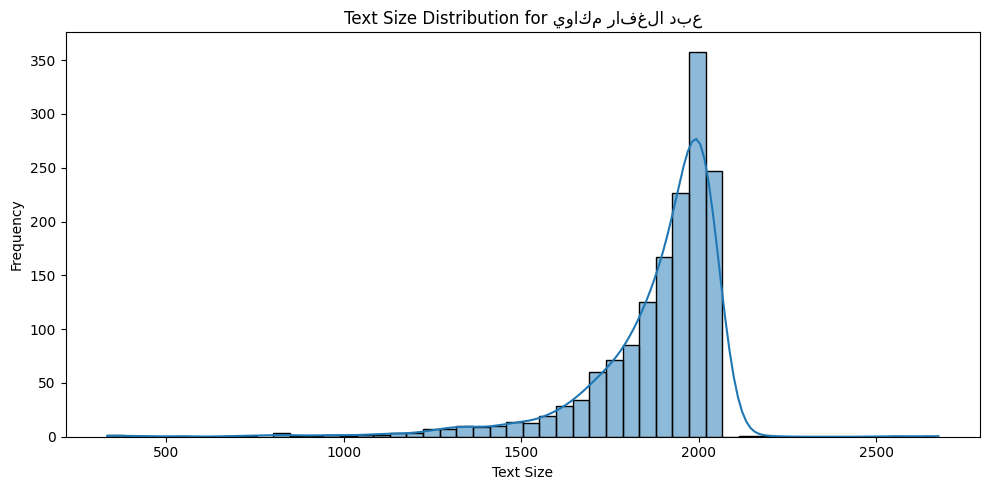

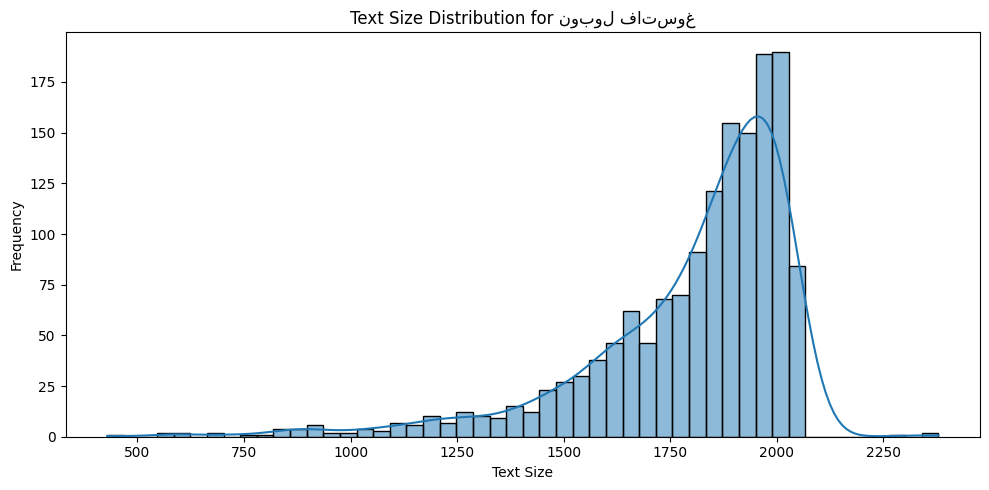

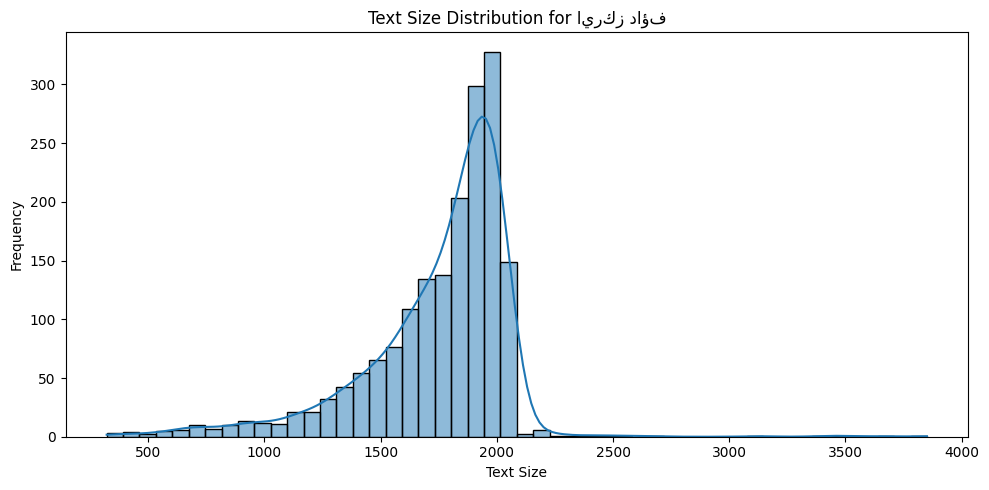

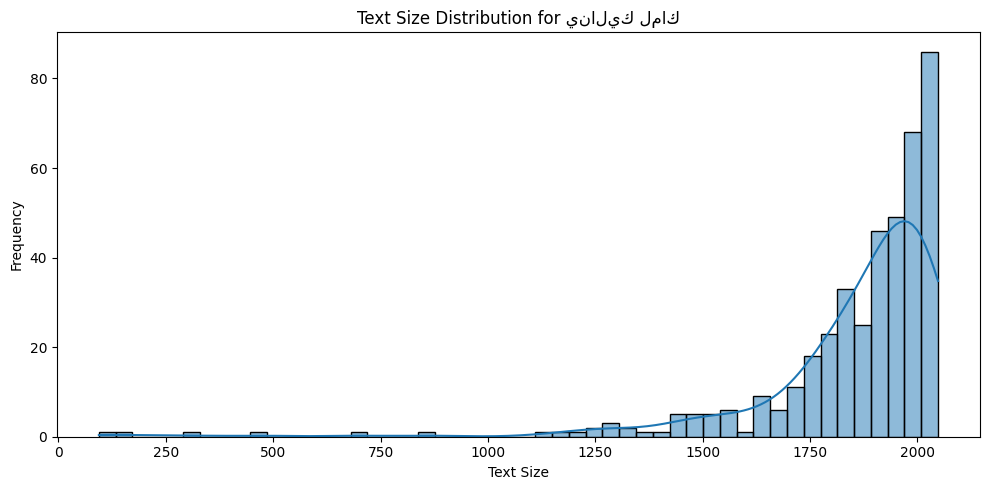

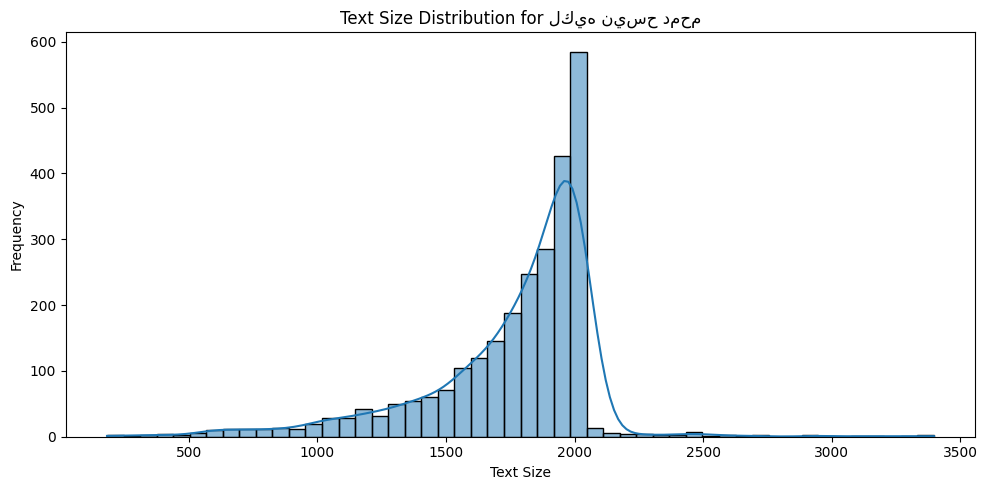

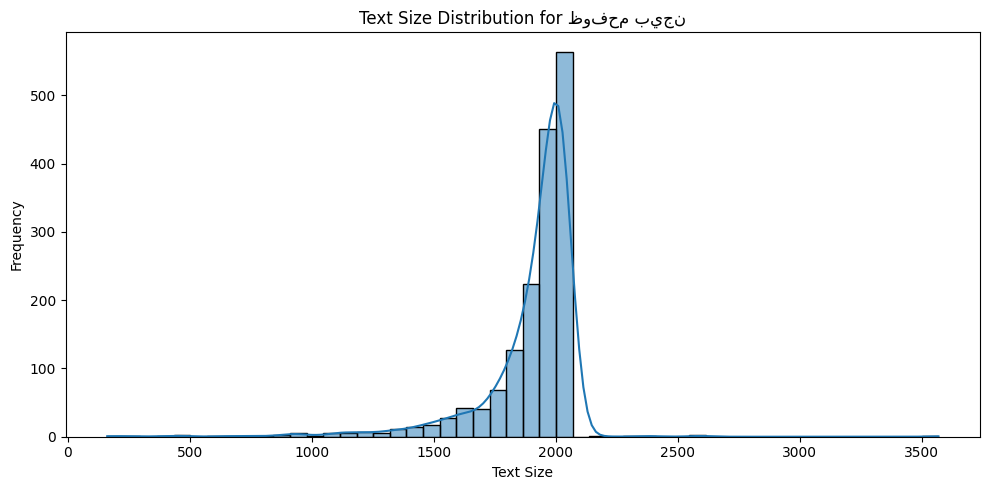

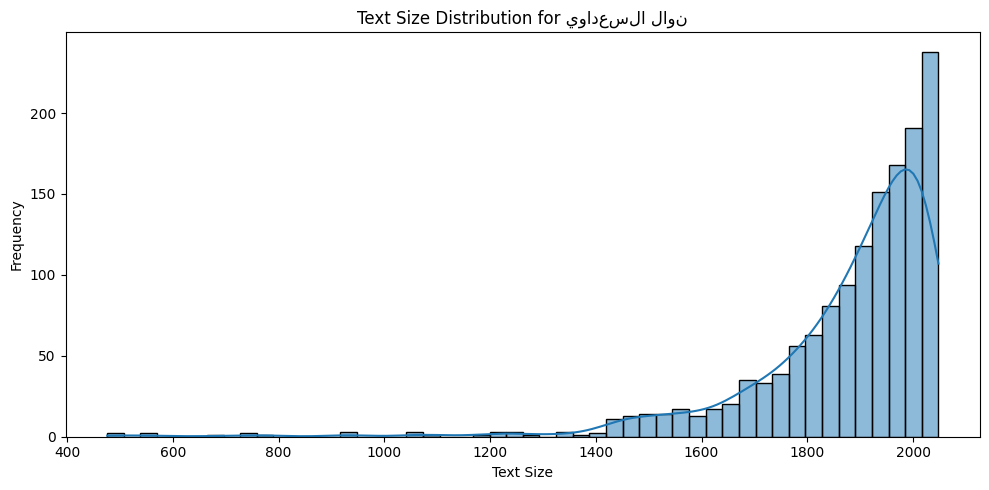

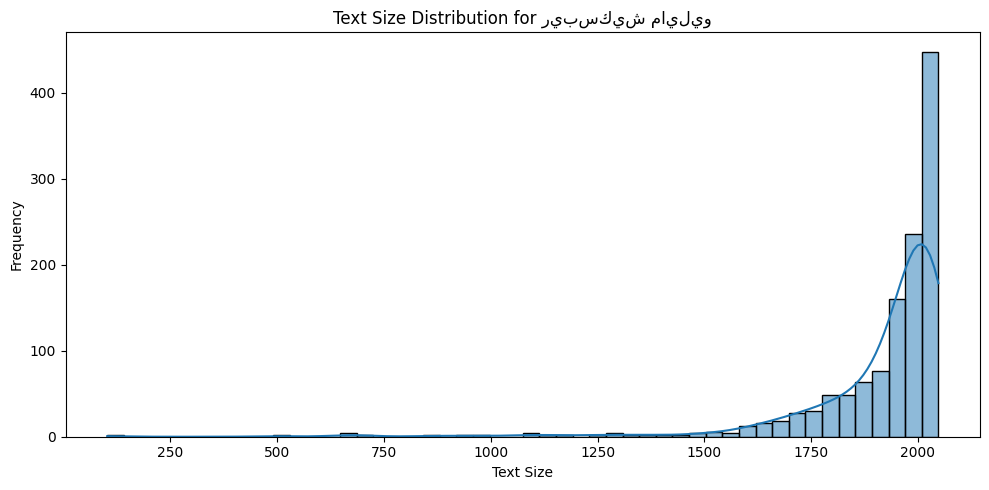

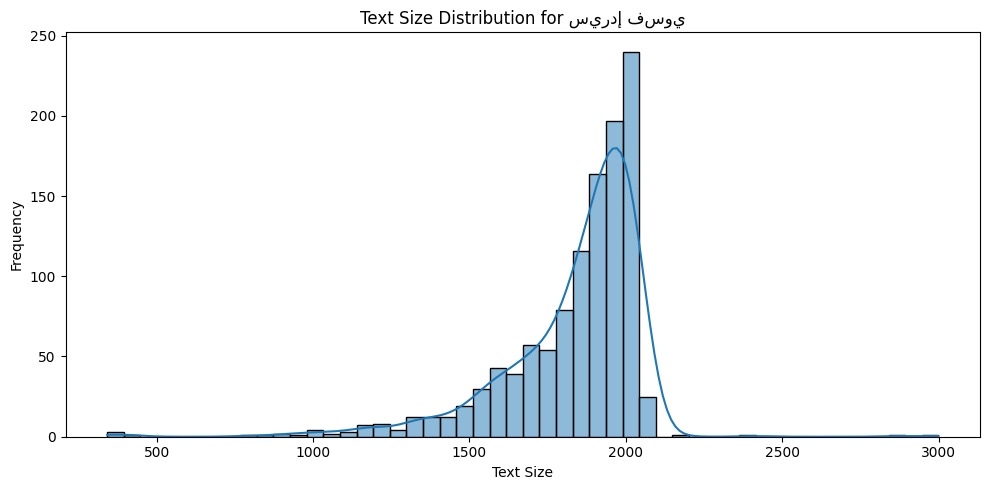

In [11]:
for author_name, author_df in grouped_by_author:
    plt.figure(figsize=(10, 5))
    sns.histplot(author_df['text_size'], bins=50, kde=True) # Increased the number of bins to 100
    names_rev_author = author_name[-1::-1]
    plt.title(f'Text Size Distribution for {names_rev_author}')
    plt.xlabel('Text Size')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

## Large Texts

In [12]:
large_texts = train_data[train_data['text_size'] > 3000].sort_values(by='text_size', ascending=False)
len(large_texts)

97

In [13]:
large_texts.author.value_counts()

,count
author,
أحمد شوقي,47
أمين الريحاني,9
عباس محمود العقاد,8
أحمد أمين,6
حسن حنفي,6
أحمد تيمور باشا,5
فؤاد زكريا,5
محمد حسين هيكل,5
طه حسين,4


In [14]:
authors_with_large_texts = large_texts['author'].unique()
print("Authors with texts larger than 3000 characters sorted:")
for author in authors_with_large_texts:
    print(author)

len(authors_with_large_texts)

Authors with texts larger than 3000 characters sorted:
أحمد شوقي
أمين الريحاني
عباس محمود العقاد
أحمد تيمور باشا
أحمد أمين
حسن حنفي
فؤاد زكريا
طه حسين
نجيب محفوظ
محمد حسين هيكل
ثروت أباظة


11

## Langauge Detection

In [15]:
!pip install -qU langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 49.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
from langdetect import detect, LangDetectException
import pandas as pd

In [ ]:
def detect_language(text):
    """
    Detects the language of the input text.

    Args:
        text (str): The input string to detect the language from.

    Returns:
        str: The detected language code (e.g., 'en', 'ar'), or 'unknown' if detection fails.
    """
    try:
        return detect(text)
    except LangDetectException:
        return 'unknown'

In [ ]:
# Apply the language detection function to the 'text_in_author_style' column
train_data['detected_language'] = train_data['text_in_author_style'].apply(detect_language)

# Display the value counts of the detected languages
print("Language distribution in the dataset:")
display(train_data['detected_language'].value_counts())

# Cleaning and Preprocessing

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

## Drop Duplicates

In [17]:
train_data['text_in_author_style'].duplicated(keep='first').sum()

np.int64(2338)

In [18]:
train_data.drop_duplicates(['text_in_author_style', 'author'],keep='first', inplace=True, ignore_index=True)

In [19]:
print(len(train_data))
print(len(train_data.author.value_counts()))
train_data.author.value_counts()

32784
21


,count
author,
حسن حنفي,3744
أحمد أمين,2897
جُرجي زيدان,2768
محمد حسين هيكل,2627
طه حسين,2376
عباس محمود العقاد,1829
فؤاد زكريا,1773
نجيب محفوظ,1634
أمين الريحاني,1567


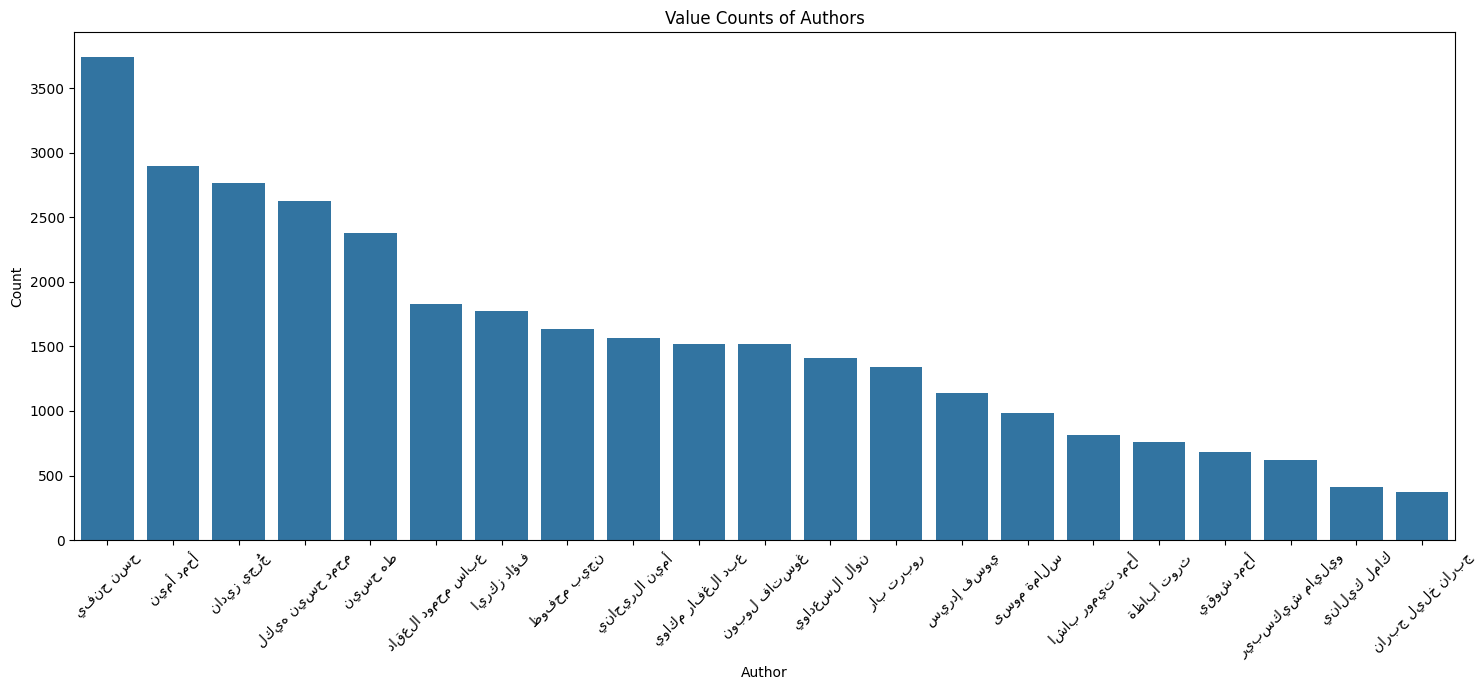

In [20]:
# Get the value counts of the 'author' column
author_counts = train_data['author'].value_counts()
names_rev = [name[-1::-1] for name in author_counts.index]

# Create a bar chart
plt.figure(figsize=(15, 7)) # Increased figure size
sns.barplot(x=names_rev, y=author_counts.values)
plt.xticks(rotation=45)
plt.xlabel('Author')
plt.ylabel('Count')
plt.title('Value Counts of Authors')
plt.tight_layout()
plt.show()

## Splitting large text

In [21]:
!pip install -qU langchain

In [22]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [23]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 2048,
    chunk_overlap  = 200,
    length_function = len,
)

In [24]:
# train_data['text_size'] = train_data['text_in_author_style'].apply(len)
# train_data.head()

In [29]:
splitted_data_list = []

for index, row in train_data.iterrows():
    text = row['text_in_author_style']
    author = row['author']
    original_id = row['id']
    text_size = row['text_size']

    # Check if the text is large
    if text_size > 3000:
        # Split the large text
        chunks = text_splitter.split_text(text)
        # Add each chunk as a new entry
        for i, chunk in enumerate(chunks):
            splitted_data_list.append({
                'original_id': original_id,
                'text_in_author_style': chunk,
                'author': author,
                'text_size': len(chunk),
                'chunk_index': i,
                'is_split': True # Flag to indicate it was a split chunk
            })
    else:
        # Add the original text if it's not large
        splitted_data_list.append({
            'original_id': original_id,
            'text_in_author_style': text,
            'author': author,
            'text_size': len(text),
            'chunk_index': 0, # Indicate it's the first and only chunk
            'is_split': False # Flag to indicate it was not split
        })

train_data_splitted = pd.DataFrame(splitted_data_list)

In [30]:
# Display the first few rows of the new DataFrame and some info
print(f"Original number of texts: {len(train_data)}")
print(f"Number of texts/chunks in the processed data: {len(train_data_splitted)}")

print("\nFirst few rows of the processed data:")
display(train_data_splitted[train_data_splitted['is_split'] == True])

print("\nValue counts for 'is_split' column:")
display(train_data_splitted['is_split'].value_counts())

Original number of texts: 32784
Number of texts/chunks in the processed data: 32941

First few rows of the processed data:


,original_id,text_in_author_style,author,text_size,chunk_index,is_split
1998,7841,وأخيرًا فقد نشأت في القرنين الثامن عشر والتاسع...,فؤاد زكريا,1975,0,True
1999,7841,يدعونا هنا إلى الإشارة إليها؛ لأنها معروفة ومأ...,فؤاد زكريا,2044,1,True
2013,7855,كذلك قد يُوجَّه إلى هذا الرأي اعتراضٌ ذو صبغة ...,فؤاد زكريا,2039,0,True
2014,7855,إن البحث الفلسفي يقتضي أمرين أساسيين هما: النض...,فؤاد زكريا,1256,1,True
2045,7886,أما اللذة الحرة-المنزَّهة عن مثل هذه\n\nالأغرا...,فؤاد زكريا,1974,0,True
...,...,...,...,...,...,...
32306,44726,ولا تنم عن نرجسٍ مؤنس\n\nيضحك عنه الزمن القاطب...,عباس محمود العقاد,2041,1,True
32307,44726,عظمت فكادت أن تكون إوَزَّة\n\nونوت فكاد إهابها...,عباس محمود العقاد,2039,2,True
32308,44726,من كل قاتلة قتلى، وآسرةٍ\n\nأسرى، وليس لها في ...,عباس محمود العقاد,2046,3,True
32312,44730,لن يسبق الله مدلج\n\nلعل قلوبًا قد أطلتم غليله...,عباس محمود العقاد,2026,0,True



Value counts for 'is_split' column:


,count
is_split,
False,32687
True,254


In [31]:
train_data_splitted['text_size'].describe()

,text_size
count,32941.000000
mean,1825.444947
std,277.572256
min,22.000000
25%,1756.000000
50%,1918.000000
75%,1998.000000
max,2999.000000


## Normalizing

# Topic Modeling

In [ ]:
!pip install -qU bertopic

## Embed Articles

In [ ]:
from sentence_transformers import SentenceTransformer
import pickle

In [ ]:
model_id = "Omartificial-Intelligence-Space/GATE-AraBert-v1"
embedding_model = SentenceTransformer(model_id, device="cuda:0")

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

In [ ]:
articles_embeddings = embedding_model.encode(train_data['text_in_author_style'].values, show_progress_bar=True, batch_size=64)

print(articles_embeddings.shape)

Batches:   0%|          | 0/513 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# Store data and embeddings
with open("bertarabic_embeddings_splitted.pkl", "wb") as fOut:
  pickle.dump({'embeddings': articles_embeddings},
              fOut,
              protocol = pickle.HIGHEST_PROTOCOL)

In [ ]:
# Generate embeddings in batches to avoid OutOfMemoryError
batch_size = 16 # Reduced batch size
# Use Matryoshka embeddings by specifying the output_dimension
# Replace 256 with your desired dimension
articles_embeddings = embedding_model.encode(train_data['text_in_author_style'].values, show_progress_bar=True, batch_size=batch_size, output_dimension=256)
print(articles_embeddings.shape)

# Gemi